### API reference
#### Categorical plots¶


In [97]:
import seaborn as sns
sns.set_theme(style="ticks")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# **catplot** Figure-level interface for drawing categorical plots onto a FacetGrid.
Returns:
    g: FacetGrid
    Returns the FacetGrid object with the plot on it for further tweaking.

In [98]:
exercise = sns.load_dataset("exercise")


In [99]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [34]:
# exercise.info()
# exercise.pulse.describe()
exercise.diet.describe()

count         90
unique         2
top       no fat
freq          45
Name: diet, dtype: object

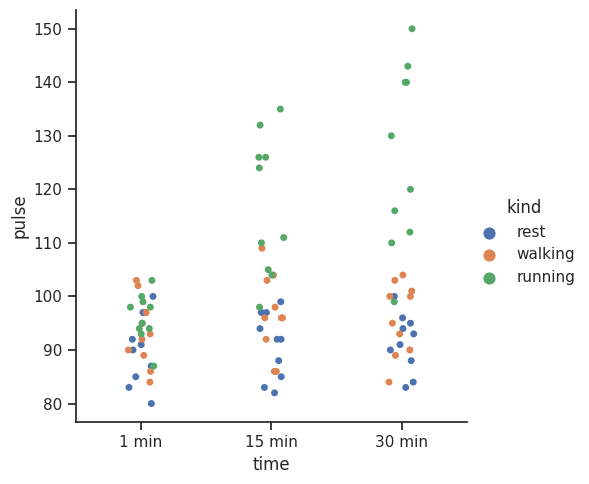

In [100]:
g = sns.catplot(x="time", y="pulse", hue='kind', data=exercise)
# g = sns.catplot(x="time", y="pulse", data=exercise[exercise.kind=='running'])

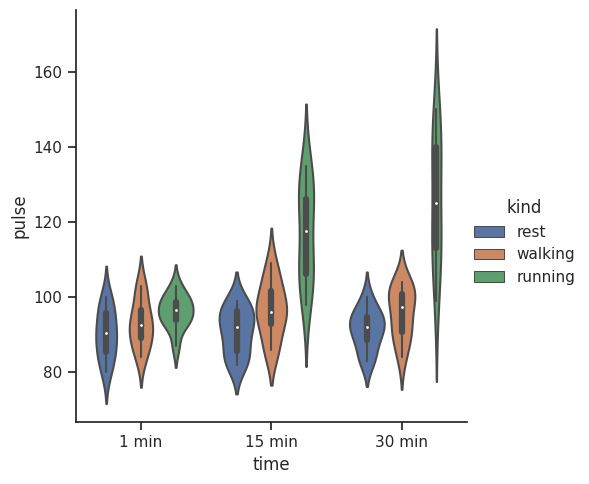

In [26]:
g = sns.catplot(x="time", y="pulse", hue="kind",
               data=exercise, kind="violin")
# g = sns.catplot(x="time", y="pulse", hue="kind",
#                data=exercise[exercise.kind=='running'], kind="violin")

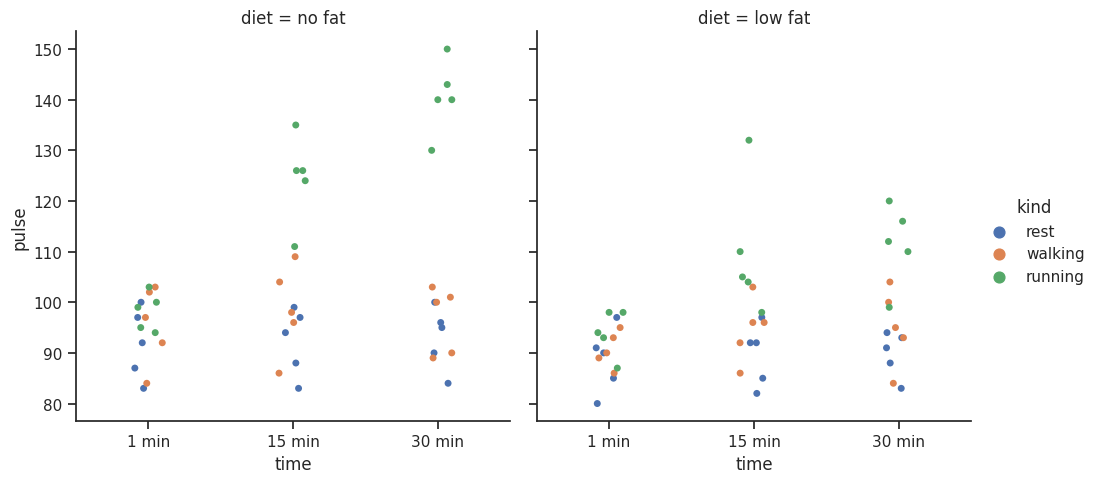

In [33]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise)

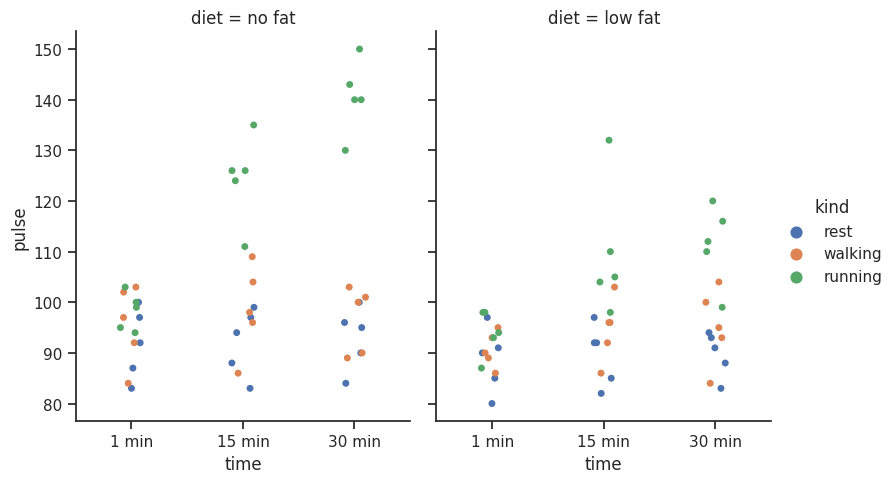

In [38]:
# g = sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, height=5, aspect=.8)
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, height=5, aspect=.8)

In [39]:
titanic = sns.load_dataset("titanic")

In [43]:
# titanic.info()
titanic.deck.nunique()
titanic.alive.nunique()

7

2

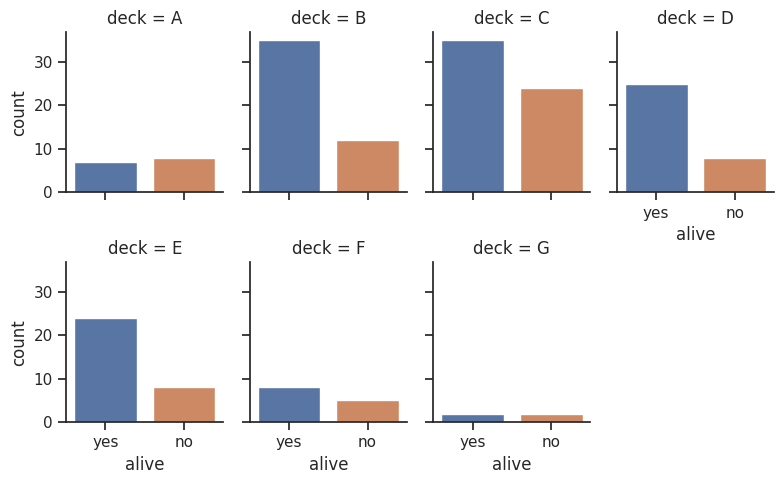

In [106]:
# count alive yes or not on every deck
g = sns.catplot(x="alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8)

In [107]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

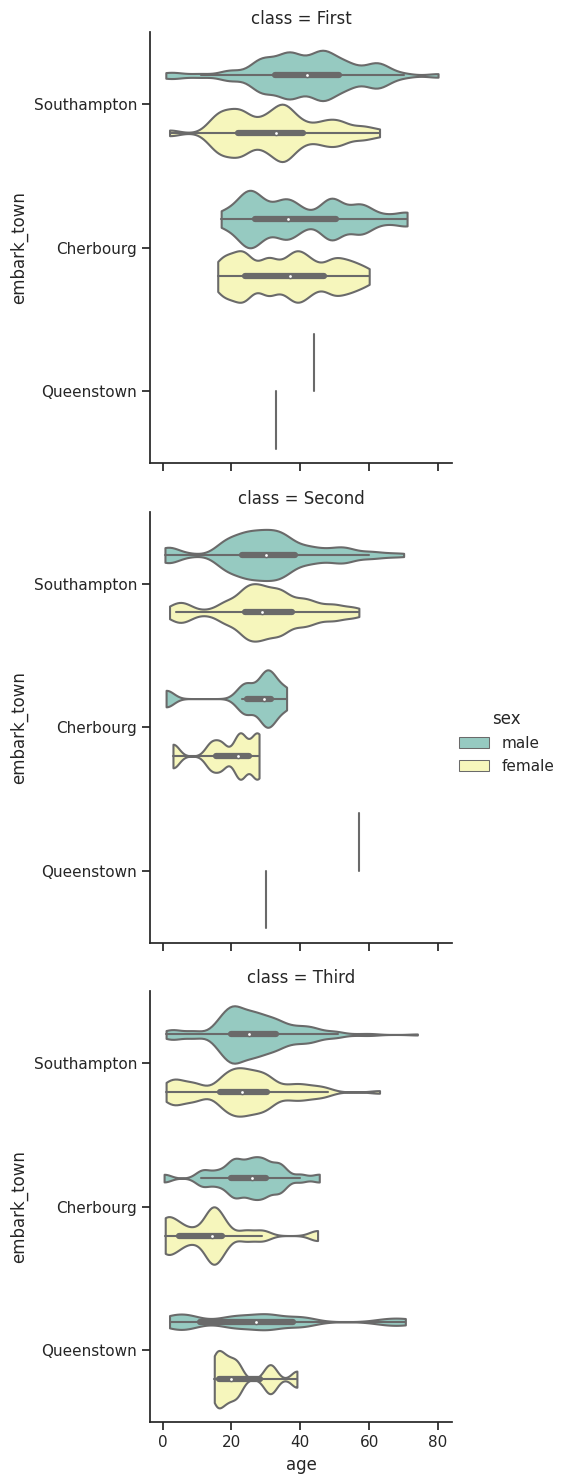

In [108]:
# g = sns.catplot(x="age", y="embark_town",
#                 hue="sex", row="class",
#                 data=titanic[titanic.embark_town.notnull()],
#                 orient="h", height=2, aspect=3, palette="Set3",
#                 kind="violin", dodge=True, cut=0, bw=.2)

data = titanic[titanic.embark_town.notnull()]
# data = data[data.age >= 60]
g = sns.catplot(x="age", y="embark_town", hue='sex', row='class',
                data=data, kind='violin', palette='Set3', dodge=True, cut=0, bw=.2, orient='h')

In [66]:
titanic.groupby('embark_town').size().reset_index(name='counts')
# data.groupby('embark_town').size().reset_index(name='counts')

,embark_town,counts
0,Cherbourg,168
1,Queenstown,77
2,Southampton,644


In [78]:
titanic.who.value_counts()
titanic[titanic['class'] == 'First'].groupby('who').size().reset_index(name='counts') 

man      537
woman    271
child     83
Name: who, dtype: int64

,who,counts
0,child,6
1,man,119
2,woman,91


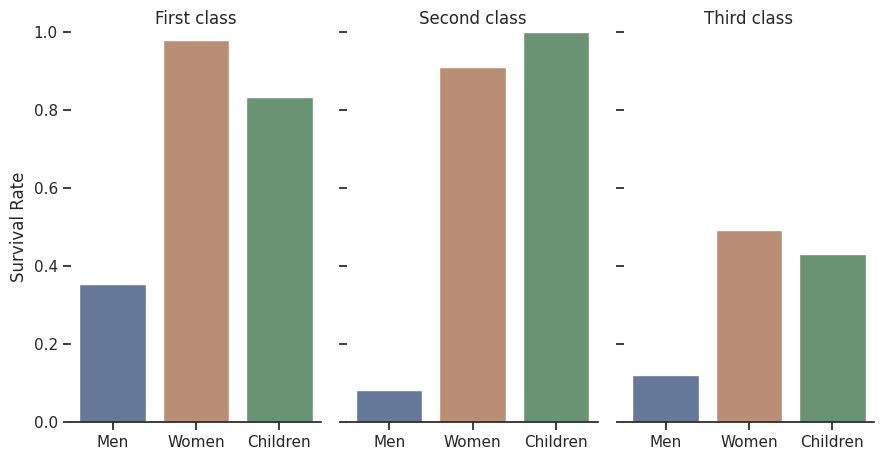

In [96]:
g = sns.catplot(x="who", y="survived", col="class", data=titanic, saturation=.5, kind="bar", ci=None, aspect=.6)
# g = sns.catplot(x="who", y="survived", col="class", data=titanic, kind="bar")
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))